In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)



In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-14.204855024087124 136.49040075310677
11.17734139042419 20.34301840267608
-3.0801202718624268 159.6860117350588
-24.335297795601534 -155.7588583867849
14.200547059052866 -81.6200255189799
-10.598089418724086 -104.49186235744715
41.824021093353196 -108.53516782651869
49.64539097368419 5.3397093439160415
38.460683084621934 -66.85560790941219
51.8940376870209 117.36139556952298
-34.895043982369074 -95.60390400802278
-2.366317105150017 143.37034654041577
57.86296421845259 -129.21575539466352
44.91757771309477 87.18447258203366
80.12402077234518 -116.867939284773
49.04382520117164 106.67011527023732
-39.09870820344561 115.10719056443367
59.37344800822157 -109.15338206848166
-57.38264044001878 -107.89497578918514
-31.128513576067924 -110.07836356314598
-82.5130899820509 -169.768992093819
57.719531022837 71.84291763745841
68.81237150449644 119.99387660055874
80.84487375510443 136.44655891545244
75.69674998681569 -82.21705954684619
46.45257493082198 -141.4378565457248
-57.2215438146235 -71.10

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    
   # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | alyangula
Processing Record 2 of Set 13 | am timan
Processing Record 3 of Set 13 | buala
Processing Record 4 of Set 13 | avera
Processing Record 5 of Set 13 | san andres
Processing Record 6 of Set 13 | puerto ayora
Processing Record 7 of Set 13 | rock springs
Processing Record 8 of Set 13 | florenville
Processing Record 9 of Set 13 | nantucket
Processing Record 10 of Set 13 | shelopugino
Processing Record 11 of Set 13 | lebu
Processing Record 12 of Set 13 | wewak
Processing Record 13 of Set 13 | terrace
Processing Record 14 of Set 13 | changji
Processing Record 15 of Set 13 | yellowknife
Processing Record 16 of Set 13 | ulaanbaatar
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | grand centre
City not found. Skipping...
Processing Record 19 of Set 13 | castro
Processing Record 20 of Set 13 | rikitea
Processing Record 21 of Set 13 | vaini
Processing Record 22 of Set 13 | t

Processing Record 32 of Set 16 | sinnamary
Processing Record 33 of Set 16 | portland
Processing Record 34 of Set 16 | kollam
Processing Record 35 of Set 16 | mouzakion
City not found. Skipping...
Processing Record 36 of Set 16 | marcona
City not found. Skipping...
Processing Record 37 of Set 16 | tiksi
Processing Record 38 of Set 16 | provideniya
Processing Record 39 of Set 16 | khatanga
Processing Record 40 of Set 16 | soyo
Processing Record 41 of Set 16 | ewo
Processing Record 42 of Set 16 | dingle
Processing Record 43 of Set 16 | tahe
Processing Record 44 of Set 16 | otradinskiy
City not found. Skipping...
Processing Record 45 of Set 16 | ancud
Processing Record 46 of Set 16 | pitkyaranta
Processing Record 47 of Set 16 | soller
Processing Record 48 of Set 16 | lipova
Processing Record 49 of Set 16 | meiganga
Processing Record 50 of Set 16 | griffith
Processing Record 1 of Set 17 | hobart
Processing Record 2 of Set 17 | gazli
Processing Record 3 of Set 17 | victoria
Processing Record

Processing Record 18 of Set 20 | rudbar
Processing Record 19 of Set 20 | wembley
Processing Record 20 of Set 20 | tabory
Processing Record 21 of Set 20 | aklavik
Processing Record 22 of Set 20 | sorong
Processing Record 23 of Set 20 | santiago del estero
Processing Record 24 of Set 20 | arzgir
Processing Record 25 of Set 20 | christchurch
Processing Record 26 of Set 20 | zemio
Processing Record 27 of Set 20 | along
Processing Record 28 of Set 20 | hualmay
Processing Record 29 of Set 20 | viking
Processing Record 30 of Set 20 | takoradi
Processing Record 31 of Set 20 | markova
Processing Record 32 of Set 20 | shanhetun
Processing Record 33 of Set 20 | nelson bay
Processing Record 34 of Set 20 | port shepstone
Processing Record 35 of Set 20 | los llanos de aridane
Processing Record 36 of Set 20 | kruszwica
Processing Record 37 of Set 20 | sena madureira
Processing Record 38 of Set 20 | persianovskiy
Processing Record 39 of Set 20 | sakaiminato
Processing Record 40 of Set 20 | jalu
Proces

Processing Record 6 of Set 24 | batsfjord
Processing Record 7 of Set 24 | fomboni
Processing Record 8 of Set 24 | kargil
Processing Record 9 of Set 24 | daru
Processing Record 10 of Set 24 | el faiyum
City not found. Skipping...
Processing Record 11 of Set 24 | ponta delgada
Processing Record 12 of Set 24 | brae
Processing Record 13 of Set 24 | bulgan
Processing Record 14 of Set 24 | gidam
Processing Record 15 of Set 24 | biella
Processing Record 16 of Set 24 | nueve de julio
Processing Record 17 of Set 24 | hongan
City not found. Skipping...
Processing Record 18 of Set 24 | nome
Processing Record 19 of Set 24 | mogadishu
Processing Record 20 of Set 24 | acari
Processing Record 21 of Set 24 | abu samrah
Processing Record 22 of Set 24 | monasterevan
City not found. Skipping...
Processing Record 23 of Set 24 | angoche
Processing Record 24 of Set 24 | malumfashi
Processing Record 25 of Set 24 | egvekinot
Processing Record 26 of Set 24 | tabiauea
City not found. Skipping...
Processing Reco

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0     Alyangula -13.8483  136.4192     86.36        70         100   
1      Am Timan  11.0297   20.2827     76.71        16           4   
2         Buala  -8.1450  159.5921     82.63        75          93   
3         Avera  33.1940  -82.5271     61.56        95         100   
4    San Andres  12.5847  -81.7006     80.62        74          20   
5  Puerto Ayora  -0.7393  -90.3518     77.56        88          78   
6  Rock Springs  41.5875 -109.2029     11.64        61          40   
7   Florenville  49.6998    5.3074     41.11        98          99   
8     Nantucket  41.2835  -70.0995     33.15        68         100   
9   Shelopugino  51.6514  117.5599     -0.56        76           9   

   Wind Speed Country                 Date  
0        8.57      AU  2023-02-01 02:58:07  
1        7.72      TD  2023-02-01 02:58:08  
2        8.46      SB  2023-02-01 02:58:09  
3        6.17      US  2023-02-01 02:44:59  
4       18.41      CO  2023-02-01 02:58:10  
5        4.99      EC  2023-02-01 02:54:34  
6       11.50      US  2023-02-01 02:58:14  
7       10.71      BE  2023-02-01 02:58:15  
8       12.66      US  2023-02-01 02:54:24  
9        3.71      RU  2023-02-01 02:58:16

In [8]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

City Country                 Date      Lat       Lng  Max Temp  \
0     Alyangula      AU  2023-02-01 02:58:07 -13.8483  136.4192     86.36   
1      Am Timan      TD  2023-02-01 02:58:08  11.0297   20.2827     76.71   
2         Buala      SB  2023-02-01 02:58:09  -8.1450  159.5921     82.63   
3         Avera      US  2023-02-01 02:44:59  33.1940  -82.5271     61.56   
4    San Andres      CO  2023-02-01 02:58:10  12.5847  -81.7006     80.62   
5  Puerto Ayora      EC  2023-02-01 02:54:34  -0.7393  -90.3518     77.56   
6  Rock Springs      US  2023-02-01 02:58:14  41.5875 -109.2029     11.64   
7   Florenville      BE  2023-02-01 02:58:15  49.6998    5.3074     41.11   
8     Nantucket      US  2023-02-01 02:54:24  41.2835  -70.0995     33.15   
9   Shelopugino      RU  2023-02-01 02:58:16  51.6514  117.5599     -0.56   

   Humidity  Cloudiness  Wind Speed  
0        70         100        8.57  
1        16           4        7.72  
2        75          93        8.46  
3        95         100        6.17  
4        74          20       18.41  
5        88          78        4.99  
6        61          40       11.50  
7        98          99       10.71  
8        68         100       12.66  
9        76           9        3.71

In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

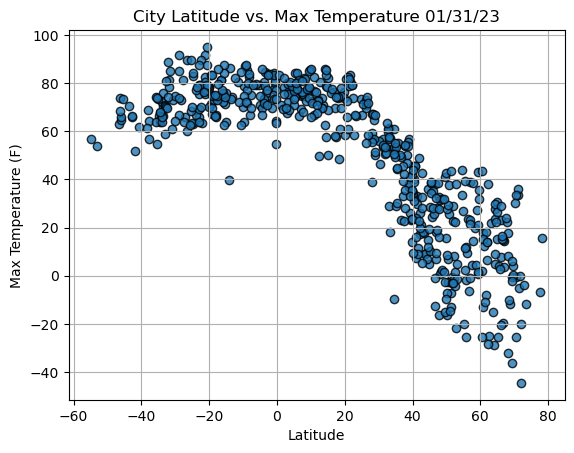

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


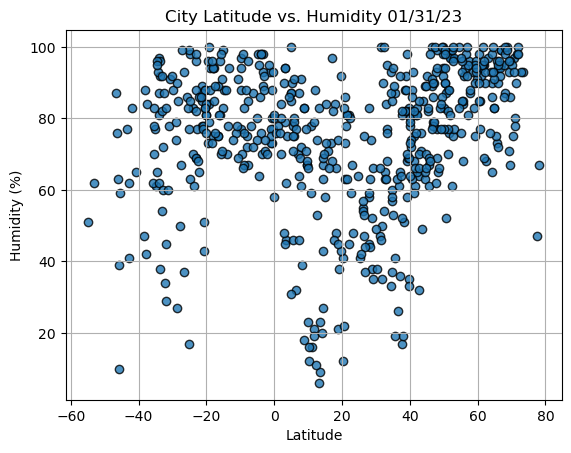

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

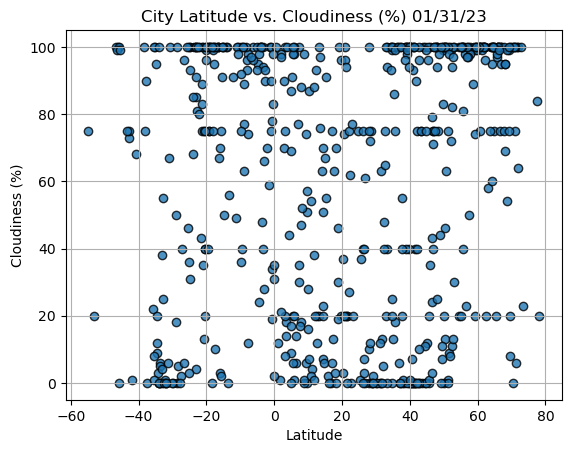

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

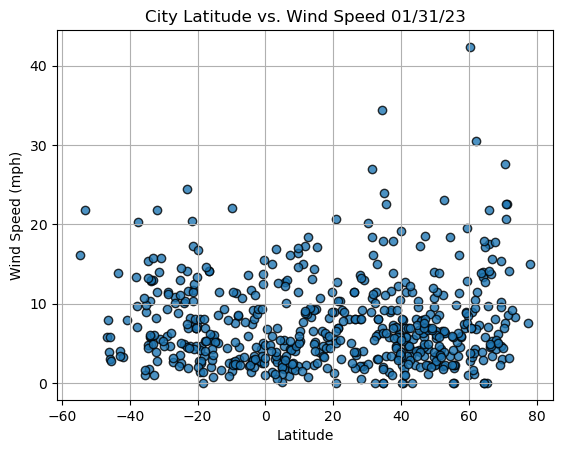

In [14]:
   # Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

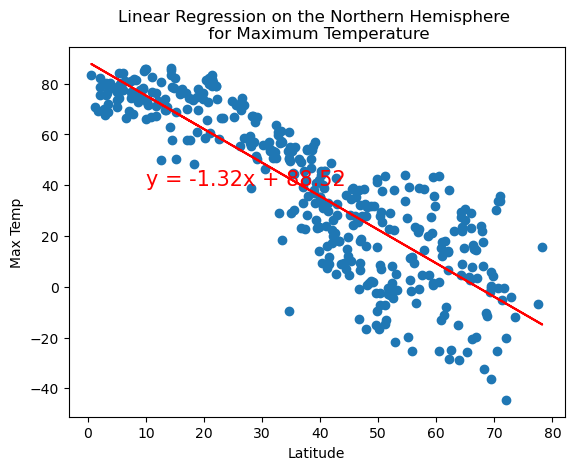

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

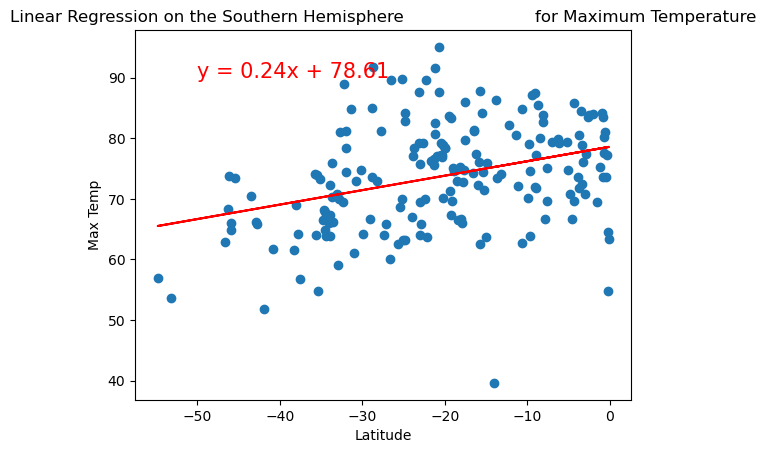

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

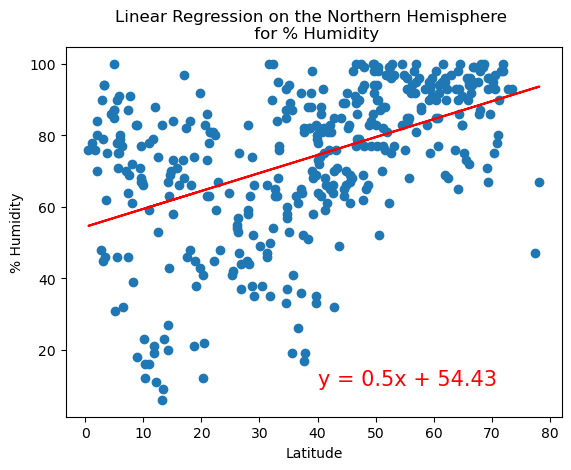

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

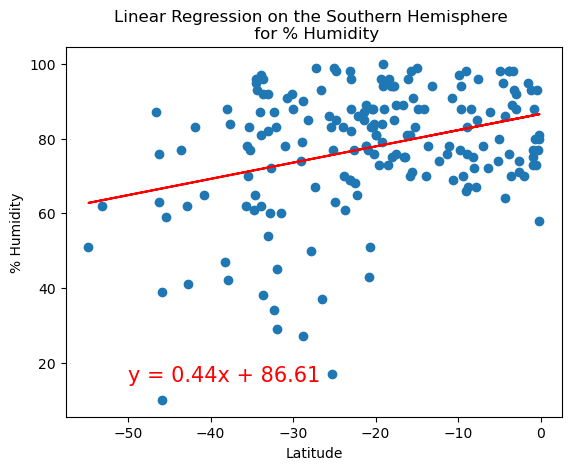

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

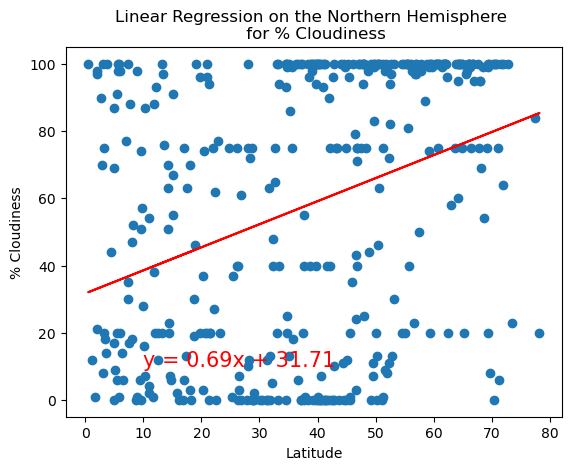

In [21]:
#skill drill 

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,10))

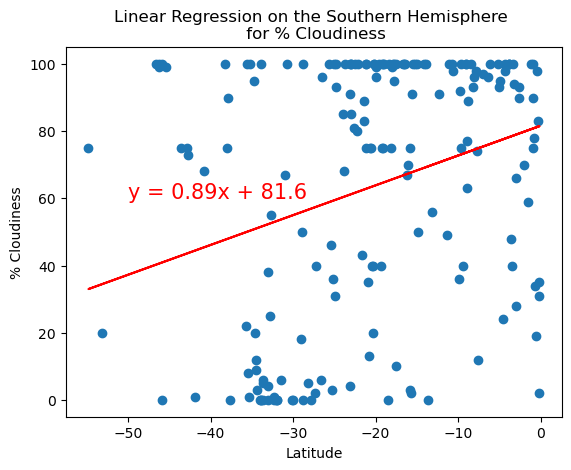

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

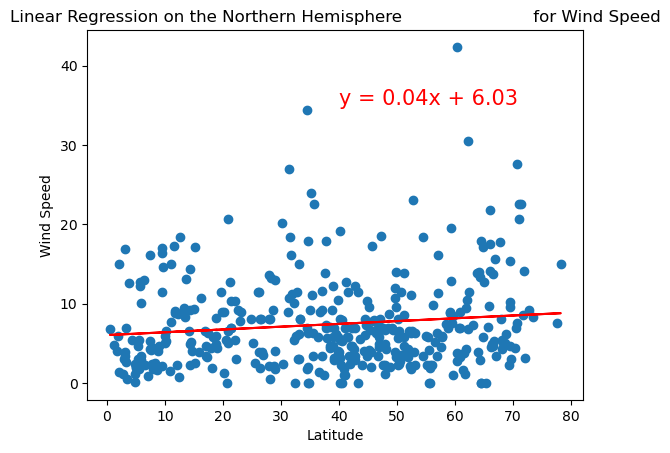

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

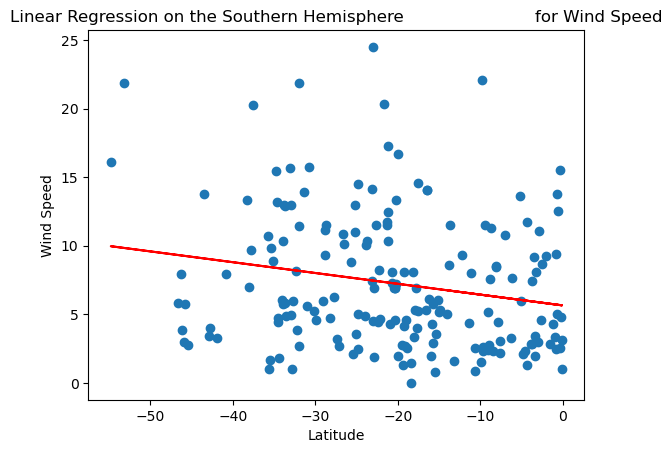

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [25]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

City_ID        City Country                 Date      Lat       Lng  \
0        0   Alyangula      AU  2023-02-01 02:58:07 -13.8483  136.4192   
1        1    Am Timan      TD  2023-02-01 02:58:08  11.0297   20.2827   
2        2       Buala      SB  2023-02-01 02:58:09  -8.1450  159.5921   
3        3       Avera      US  2023-02-01 02:44:59  33.1940  -82.5271   
4        4  San Andres      CO  2023-02-01 02:58:10  12.5847  -81.7006   

   Max Temp  Humidity  Cloudiness  Wind Speed  
0     86.36        70         100        8.57  
1     76.71        16           4        7.72  
2     82.63        75          93        8.46  
3     61.56        95         100        6.17  
4     80.62        74          20       18.41

In [27]:
# Configure the map plot_1
map_plot_1 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM"
)

In [28]:
# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [29]:
# Configure the map plot_2
map_plot_2 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [30]:
# Configure the map plot_3
map_plot_3 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City"
)

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [31]:
# Configure the map plot_3
map_plot_3 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City"
)

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [32]:
# Configure the map plot_4
map_plot_4 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City"
)

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [33]:
# Configure the map plot_4
map_plot_4 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Wind Speed",
    scale = 1.0,
    color = "City"
)

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Wind Speed)

In [37]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))

max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [39]:
preferred_cities_df = city_data_df.loc[
    (city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)
]
preferred_cities_df.head(10)

City_ID          City Country                 Date      Lat       Lng  \
0         0     Alyangula      AU  2023-02-01 02:58:07 -13.8483  136.4192   
1         1      Am Timan      TD  2023-02-01 02:58:08  11.0297   20.2827   
2         2         Buala      SB  2023-02-01 02:58:09  -8.1450  159.5921   
4         4    San Andres      CO  2023-02-01 02:58:10  12.5847  -81.7006   
5         5  Puerto Ayora      EC  2023-02-01 02:54:34  -0.7393  -90.3518   
11       11         Wewak      PG  2023-02-01 02:58:17  -3.5534  143.6268   
18       18       Rikitea      PF  2023-02-01 02:58:21 -23.1203 -134.9692   
19       19         Vaini      TO  2023-02-01 02:58:22 -21.2000 -175.2000   
30       30     Busselton      AU  2023-02-01 02:58:35 -33.6500  115.3333   
33       33   Port-Gentil      GA  2023-02-01 02:54:06  -0.7193    8.7815   

    Max Temp  Humidity  Cloudiness  Wind Speed  
0      86.36        70         100        8.57  
1      76.71        16           4        7.72  
2      82.63        75          93        8.46  
4      80.62        74          20       18.41  
5      77.56        88          78        4.99  
11     84.52        70          48        9.15  
18     79.21        69           4       14.14  
19     82.56        89          75       10.36  
30     75.92        38           0       12.86  
33     80.19        80          34       13.76

In [40]:
preferred_cities_df.count()

City_ID       137
City          137
Country       137
Date          137
Lat           137
Lng           137
Max Temp      137
Humidity      137
Cloudiness    137
Wind Speed    137
dtype: int64

In [41]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

City Country  Max Temp      Lat       Lng Hotel Name
0      Alyangula      AU     86.36 -13.8483  136.4192           
1       Am Timan      TD     76.71  11.0297   20.2827           
2          Buala      SB     82.63  -8.1450  159.5921           
4     San Andres      CO     80.62  12.5847  -81.7006           
5   Puerto Ayora      EC     77.56  -0.7393  -90.3518           
11         Wewak      PG     84.52  -3.5534  143.6268           
18       Rikitea      PF     79.21 -23.1203 -134.9692           
19         Vaini      TO     82.56 -21.2000 -175.2000           
30     Busselton      AU     75.92 -33.6500  115.3333           
33   Port-Gentil      GA     80.19  -0.7193    8.7815

In [42]:
# Set initial parameters to search for a hotel.

from config import geoapify_key

radius = 5000
params = {
    "categories":"accommodation.hotel",
    "apiKey": geoapify_key,
}

In [43]:
# Set the parameters to search for a hotel in Paris.
latitude = 48.8566
longitude = 2.3522
radius = 5000
params = {
    "categories": "accommodation.hotel",
    "apiKey": geoapify_key,
    "filter": f"circle:{longitude},{latitude},{radius}"
}

# Set up the base URL for the Geoapify Places API.
base_url = "https://api.geoapify.com/v2/places"

# Make request and retrieve the JSON data by using the params dictionary
hotels = requests.get(base_url, params=params).json()

# Display the JSON data
hotels

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'Hilton Paris Opera',
    'country': 'France',
    'country_code': 'fr',
    'region': 'Metropolitan France',
    'state': 'Ile-de-France',
    'city': 'Paris',
    'postcode': '75008',
    'district': 'Paris',
    'suburb': "Quartier de l'Europe",
    'street': 'Rue Saint-Lazare',
    'housenumber': '108',
    'lon': 2.3258962791827065,
    'lat': 48.87572165,
    'formatted': 'Hilton Paris Opera, 108 Rue Saint-Lazare, 75008 Paris, France',
    'address_line1': 'Hilton Paris Opera',
    'address_line2': '108 Rue Saint-Lazare, 75008 Paris, France',
    'categories': ['accommodation',
     'accommodation.hotel',
     'building',
     'building.accommodation',
     'internet_access',
     'internet_access.free'],
    'details': ['details',
     'details.accommodation',
     'details.building',
     'details.contact',
     'details.facilities',
     'details.payment',
     'details.wiki_and_media'],


In [44]:
len(hotels["features"])

20